In [4]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
siguniang = pd.read_csv('Datasets/Mt_Siguniang_2018-2020.csv', index_col='Date', parse_dates = ['Date'])
siguniang = siguniang.fillna(method="ffill")
siguniang.head()

,Tourist_Arrival_volume
Date,
2018-01-01,1074.0
2018-01-02,294.0
2018-01-03,196.0
2018-01-04,174.0
2018-01-05,192.0


In [6]:
siguniang

,Tourist_Arrival_volume
Date,
2018-01-01,1074.0
2018-01-02,294.0
2018-01-03,196.0
2018-01-04,174.0
2018-01-05,192.0
...,...
2020-01-24,152.0
2020-01-25,228.0
2020-01-26,599.0


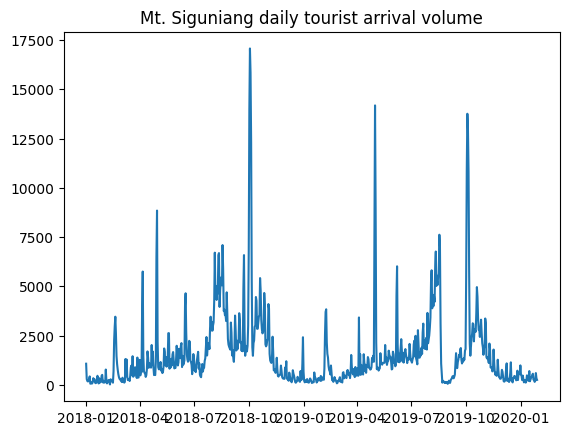

In [7]:
plt.plot(siguniang)
plt.title('Mt. Siguniang daily tourist arrival volume')
plt.show()

In [8]:
np.random.seed(7)

In [9]:
sig_ds = siguniang.values
sig_ds = sig_ds.astype('float32')

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
sig_ds = scaler.fit_transform(sig_ds)
len_sig = len(sig_ds)

In [11]:
train_size = int(len(sig_ds)*0.87)
test_size = len_sig - train_size
train, test = sig_ds[0:train_size, :], sig_ds[train_size:len_sig, :]
print(len(train), len(test))

659 99


In [12]:
def create_dataset(dataset, look_back=3):
    X_data, Y_data = [], []
    for i in range(len(dataset) - look_back - 1):
        ds = dataset[i:(i+look_back), 0]
        X_data.append(ds)
        Y_data.append(dataset[i+look_back,0])
    return np.array(X_data), np.array(Y_data)    

In [13]:
look_back = 3
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [15]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, Y_train, epochs=50, verbose=0)

In [16]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [17]:
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])

In [18]:
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [19]:
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
print('Train score: %.2f RMSE' % (train_score))

Train score: 991.77 RMSE


In [20]:
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print('Test score: %.2f RMSE' % (test_score))

Test score: 440.22 RMSE


In [21]:
train_mape = mean_absolute_percentage_error(Y_train[0], train_predict[:, 0])
print('Train score: %.2f MAPE' % (train_mape))

Train score: 0.61 MAPE


In [22]:
test_mape = mean_absolute_percentage_error(Y_test[0], test_predict[:, 0])
print('Test score: %.2f MAPE' % (test_mape))

Test score: 0.74 MAPE


In [23]:
trainPredictPlot = np.empty_like(sig_ds)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [24]:
testPredictPlot = np.empty_like(sig_ds)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len_sig-1, :] = test_predict


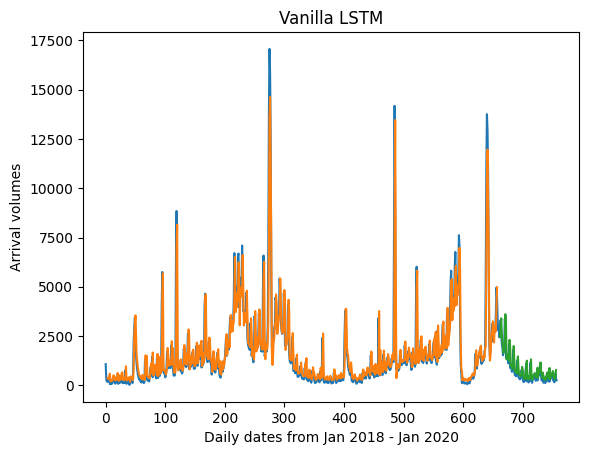

In [25]:
plt.plot(scaler.inverse_transform(sig_ds))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("Vanilla LSTM")
plt.xlabel("Daily dates from Jan 2018 - Jan 2020")
plt.ylabel("Arrival volumes")
plt.show()

In [26]:
look_back = 3
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [28]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, Y_train, epochs=50, verbose=0)

In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [30]:
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])

In [31]:
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [32]:
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
print('Train score: %.2f RMSE' % (train_score))

Train score: 973.64 RMSE


In [33]:
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print('Test score: %.2f RMSE' % (test_score))

Test score: 452.11 RMSE


In [34]:
train_mape = mean_absolute_percentage_error(Y_train[0], train_predict[:, 0])
print('Train score: %.2f MAPE' % (train_mape))

Train score: 0.67 MAPE


In [35]:
test_mape = mean_absolute_percentage_error(Y_test[0], test_predict[:, 0])
print('Test score: %.2f MAPE' % (test_mape))

Test score: 0.79 MAPE


In [36]:
trainPredictPlot = np.empty_like(sig_ds)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [37]:
testPredictPlot = np.empty_like(sig_ds)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len_sig-1, :] = test_predict


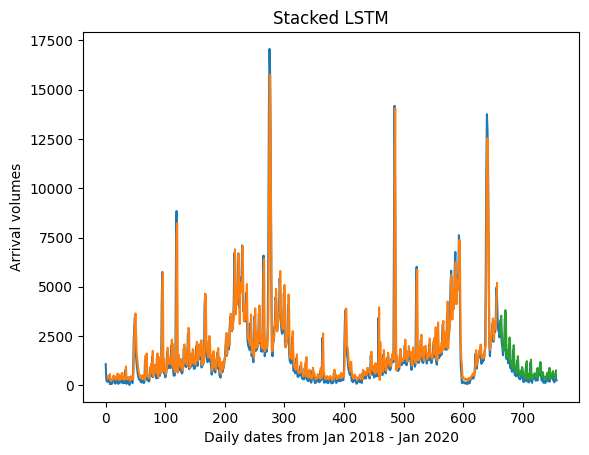

In [38]:
plt.plot(scaler.inverse_transform(sig_ds))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("Stacked LSTM")
plt.xlabel("Daily dates from Jan 2018 - Jan 2020")
plt.ylabel("Arrival volumes")
plt.show()

In [39]:
look_back = 3
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [40]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [41]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, Y_train, epochs=50, verbose=0)

In [42]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [43]:
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])

In [44]:
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [45]:
train_score = math.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
print('Train score: %.2f RMSE' % (train_score))

Train score: 989.24 RMSE


In [46]:
test_score = math.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print('Test score: %.2f RMSE' % (test_score))

Test score: 398.28 RMSE


In [47]:
train_mape = mean_absolute_percentage_error(Y_train[0], train_predict[:, 0])
print('Train score: %.2f MAPE' % (train_mape))

Train score: 0.42 MAPE


In [48]:
test_mape = mean_absolute_percentage_error(Y_test[0], test_predict[:, 0])
print('Test score: %.2f MAPE' % (test_mape))

Test score: 0.52 MAPE


In [49]:
trainPredictPlot = np.empty_like(sig_ds)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [50]:
testPredictPlot = np.empty_like(sig_ds)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len_sig-1, :] = test_predict


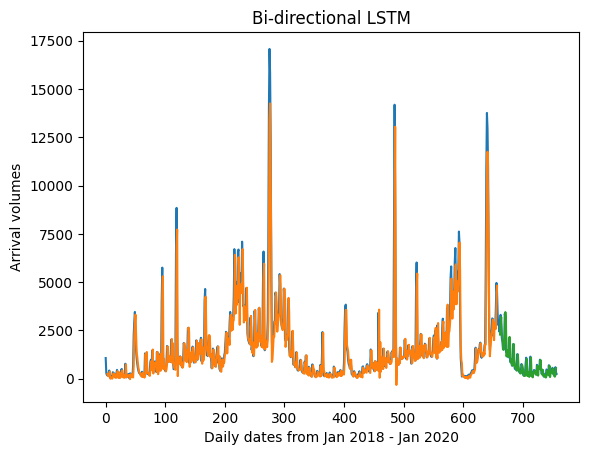

In [51]:
plt.plot(scaler.inverse_transform(sig_ds))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("Bi-directional LSTM")
plt.xlabel("Daily dates from Jan 2018 - Jan 2020")
plt.ylabel("Arrival volumes")
plt.show()